# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
#%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [7]:
import numpy as np

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
25,202204,일,0,11010,11010,F,25,HW,10,*
159,202204,일,0,11010,11010,M,40,HW,20,*
222,202204,일,0,11010,11020,F,20,HE,20,*
224,202204,일,0,11010,11020,F,20,EW,20,*
225,202204,일,0,11010,11020,F,20,WW,10,*
...,...,...,...,...,...,...,...,...,...,...
968425,202204,토,23,39000,11240,M,20,EW,60,*
968426,202204,토,23,39000,11240,M,20,EE,70,*
968439,202204,토,23,39000,11250,F,20,EE,80,*
968441,202204,토,23,39000,11250,F,30,EE,70,*


In [9]:
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].replace('*', np.NaN)

In [10]:
seoul_moving = seoul_moving.dropna()

In [11]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체


In [12]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype('float')

#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5071239
HE    4862072
EE    4377788
WH    2770340
HW    2432742
WE    2343722
EW    1875474
WW     873431
HH     474205
Name: 이동유형, dtype: int64

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

토    4107001
금    4044366
목    3473409
수    3428786
화    3404321
월    3368429
일    3254701
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['성별'].value_counts()

M    13970365
F    11110648
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [16]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [17]:
seoul_moving['도착시간'].astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
968458    23
968459    23
968460    23
968461    23
968462    23
Name: 도착시간, Length: 25081013, dtype: int32

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_night = seoul_moving[seoul_moving.도착시간 < 5]

In [19]:
seoul_moving_night.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [20]:
grouped_day = seoul_moving_night.groupby('요일')

In [21]:
group_sun = grouped_day.get_group('일')['이동인구(합)'].agg(sum)
group_mon = grouped_day.get_group('월')['이동인구(합)'].agg(sum)
group_tue = grouped_day.get_group('화')['이동인구(합)'].agg(sum)
group_wed = grouped_day.get_group('수')['이동인구(합)'].agg(sum)
group_thr = grouped_day.get_group('목')['이동인구(합)'].agg(sum)
group_fir = grouped_day.get_group('금')['이동인구(합)'].agg(sum)
group_sat = grouped_day.get_group('토')['이동인구(합)'].agg(sum)

In [22]:
group_sat

5104020.140000001

In [23]:
list_day = [group_sun,group_mon,group_tue,group_wed,group_thr,group_fir,group_sat]
list_day.sort(reverse = True)
list_day

[5104020.140000001,
 4099843.5700000008,
 3442084.96,
 3216602.5800000005,
 3110566.9499999997,
 2944929.5999999996,
 2417204.17]

In [24]:
data_day = pd.pivot_table(seoul_moving_night, index = '요일', values = '이동인구(합)', aggfunc='sum')
data_day = data_day.sort_values(by = '이동인구(합)', ascending= False)
print(data_day)

         이동인구(합)
요일              
토   5.104020e+06
금   4.099844e+06
일   3.442085e+06
목   3.216603e+06
수   3.110567e+06
화   2.944930e+06
월   2.417204e+06


#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving.loc[seoul_moving['출발 시군구 코드'].between(11010,11250)]
seoul_moving = seoul_moving.loc[seoul_moving['도착 시군구 코드'].between(11010,11250)]

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['출발 시군구 코드'].unique()

array([11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090,
       11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180,
       11190, 11200, 11210, 11220, 11230, 11240, 11250], dtype=int64)

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [27]:
pd.options.display.float_format = '{:.2f}'.format

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving[seoul_moving['출발 시군구 코드'] != seoul_moving['도착 시군구 코드']]

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_out = seoul_moving.groupby('출발 시군구 코드')['이동인구(합)'].sum()
seoul_moving_in = seoul_moving.groupby('도착 시군구 코드')['이동인구(합)'].sum()

In [30]:
seoul_moving_out.sort_values(ascending=False)

출발 시군구 코드
11230   21522649.87
11220   15213227.84
11190   13107184.85
11020   13018588.96
11240   12845304.84
11010   12463489.75
11140   11906125.83
11080    9676650.19
11040    9608095.34
11130    9488127.01
11210    9183443.13
11200    8913565.12
11060    8853066.46
11050    8465268.66
11030    8416444.06
11110    8325740.73
11160    8154296.45
11170    7296939.51
11150    7242460.10
11250    6980049.23
11090    6481270.60
11120    6314822.77
11070    6288561.23
11100    5671793.68
11180    4113326.03
Name: 이동인구(합), dtype: float64

In [31]:
seoul_moving_in.sort_values(ascending=False)

도착 시군구 코드
11230   21454022.14
11220   15278440.44
11190   13095461.33
11020   13000058.11
11240   12796901.32
11010   12412234.68
11140   11929979.72
11080    9641445.00
11040    9563524.75
11130    9444367.15
11210    9177223.38
11200    8901763.75
11060    8867335.46
11030    8517801.99
11050    8506071.77
11160    8397819.23
11110    8303833.40
11170    7269488.11
11150    7231522.15
11250    6940247.01
11090    6475146.53
11070    6296517.64
11120    6291714.73
11100    5660299.43
11180    4097273.02
Name: 이동인구(합), dtype: float64

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving[seoul_moving.도착시간 > 4]

#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_time_ave = seoul_moving.groupby('도착 시군구 코드', as_index=False)['평균 이동 시간(분)'].mean()
seoul_moving_time_sum = seoul_moving.groupby('도착 시군구 코드', as_index=False)['평균 이동 시간(분)'].sum()

In [34]:
seoul_moving_time_ave

,도착 시군구 코드,평균 이동 시간(분)
0,11010,21.65
1,11020,21.26
2,11030,21.71
3,11040,22.05
4,11050,22.82
5,11060,21.87
6,11070,23.81
7,11080,22.37
8,11090,24.18
9,11100,24.95


In [35]:
seoul_moving_time_sum

,도착 시군구 코드,평균 이동 시간(분)
0,11010,8124270
1,11020,8087190
2,11030,7275480
3,11040,7597360
4,11050,7282180
5,11060,7482210
6,11070,6496810
7,11080,7670710
8,11090,6210880
9,11100,5578260


In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_pop_ave = seoul_moving.groupby('도착 시군구 코드', as_index=False)['이동인구(합)'].mean()
seoul_moving_pop_sum = seoul_moving.groupby('도착 시군구 코드', as_index=False)['이동인구(합)'].sum()

In [37]:
seoul_moving_pop_ave

,도착 시군구 코드,이동인구(합)
0,11010,32.39
1,11020,33.41
2,11030,24.56
3,11040,26.70
4,11050,25.49
5,11060,24.75
6,11070,21.92
7,11080,26.83
8,11090,24.16
9,11100,24.16


In [38]:
seoul_moving_pop_sum

,도착 시군구 코드,이동인구(합)
0,11010,12154432.23
1,11020,12706201.14
2,11030,8227472.07
3,11040,9200066.45
4,11050,8135375.41
5,11060,8466737.47
6,11070,5979216.85
7,11080,9197241.55
8,11090,6204624.77
9,11100,5401675.41


In [39]:
# 파일을 합쳐볼까요
#seoul_moving_dd = seoul_moving.groupby('자치구', as_index=False)['이동인구(합)'].mean()

In [40]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
seoul_moving.to_csv("df_seoul_moving.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [41]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

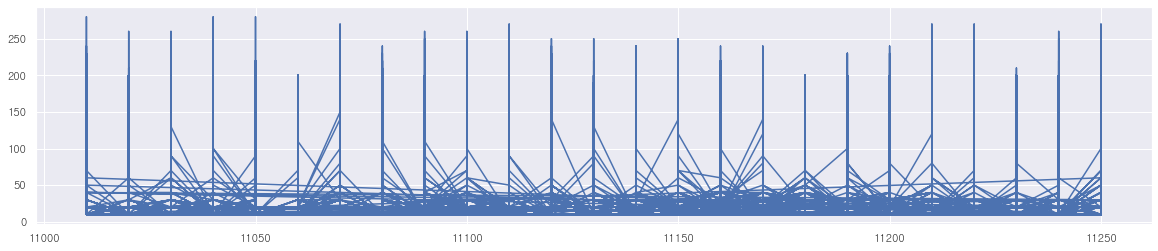

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(20,4))
plt.plot('출발 시군구 코드', '평균 이동 시간(분)', data = seoul_moving)

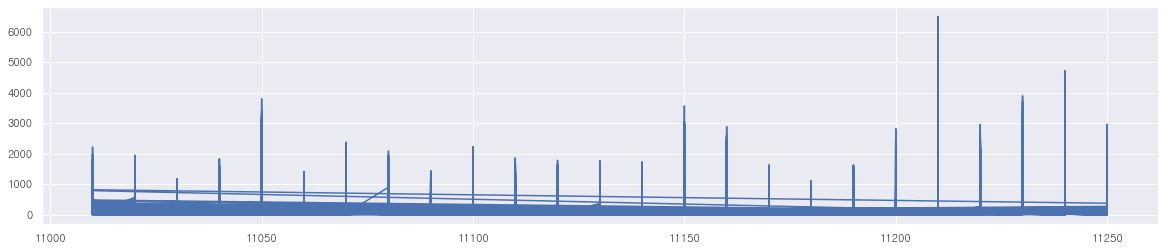

In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(20,4))
plt.plot('출발 시군구 코드', '이동인구(합)', data = seoul_moving)

In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [45]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---